In [1]:
import numpy as np

Define a function to compute the Hilbert matrix

In [15]:
def hilbert(n: int) -> np.ndarray:
    """computes the n x n Hilbert matrix.
    Args:
        n: The size of the matrix.
    """
    H = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            H[i, j] = 1.0 / (i + j + 1)
    return H

Check the condition number of the Hilbert matrix for various sizes

We import the inverse Hilbert matrix from scipy. Note that we could have imported the Hilbert matrix itself as well, instead of defining it ourselves. It is easy to compute the infinity-norm condition number "by hand", as the entries of the inverse Hilbert matrix are integers and can be computed from a formula. We compare the result to the estimate provided by numpy's intrinsic function


In [31]:
from scipy.linalg import invhilbert
for n in range(1, 12):
    H = hilbert(n)
    # get condition number from numpy 
    kappa = np.linalg.cond(H, p=np.inf)
    # compute condition number "by hand"
    H_norm = np.linalg.norm(H, ord=np.inf)
    H_inv_norm = np.linalg.norm(invhilbert(n), ord=np.inf)
    kappa_alt = H_norm * H_inv_norm
    print(f"n={n}: cond(H) =  {kappa:.6e}, theoretical = {kappa_alt:.6e}, ratio = {kappa / kappa_alt:.6f}")


n=1: cond(H) =  1.000000e+00, theoretical = 1.000000e+00, ratio = 1.000000
n=2: cond(H) =  2.700000e+01, theoretical = 2.700000e+01, ratio = 1.000000
n=3: cond(H) =  7.480000e+02, theoretical = 7.480000e+02, ratio = 1.000000
n=4: cond(H) =  2.837500e+04, theoretical = 2.837500e+04, ratio = 1.000000
n=5: cond(H) =  9.436560e+05, theoretical = 9.436560e+05, ratio = 1.000000
n=6: cond(H) =  2.907028e+07, theoretical = 2.907028e+07, ratio = 1.000000
n=7: cond(H) =  9.851949e+08, theoretical = 9.851949e+08, ratio = 1.000000
n=8: cond(H) =  3.387279e+10, theoretical = 3.387279e+10, ratio = 1.000000
n=9: cond(H) =  1.099653e+12, theoretical = 1.099655e+12, ratio = 0.999999
n=10: cond(H) =  3.535249e+13, theoretical = 3.535744e+13, ratio = 0.999860
n=11: cond(H) =  1.230019e+15, theoretical = 1.233702e+15, ratio = 0.997015


We solve a linear system with the Hilbert matrix and exact solution x = [1, 1, ..., 1] 

In [32]:
error_list = []
dims = range(1, 20)
for n in dims:
    H = hilbert(n)
    # Compute right-hand side Hx where x = [1, 1, ..., 1]
    b = np.array([sum(H[i,:]) for i in range(n)])
    # Exact solution is x = [1, 1, ..., 1]
    x = np.linalg.solve(H, b)
    err = np.linalg.norm(np.abs(x-np.ones(n)))/np.linalg.norm(np.ones(n))
    error_list.append(err)
    print(f"Relative error for n={n}: {err:.6e}")

Relative error for n=1: 0.000000e+00
Relative error for n=2: 4.227603e-16
Relative error for n=3: 6.312995e-16
Relative error for n=4: 4.248917e-13
Relative error for n=5: 5.273866e-12
Relative error for n=6: 3.813937e-10
Relative error for n=7: 1.621947e-08
Relative error for n=8: 3.257894e-07
Relative error for n=9: 5.915094e-06
Relative error for n=10: 5.548388e-05
Relative error for n=11: 8.955697e-03
Relative error for n=12: 2.258989e-01
Relative error for n=13: 1.546616e+00
Relative error for n=14: 1.181311e+01
Relative error for n=15: 3.858501e+00
Relative error for n=16: 1.605999e+01
Relative error for n=17: 9.638702e+00
Relative error for n=18: 1.247445e+01
Relative error for n=19: 8.757382e+00


Plot the condition number and compare with the error. We also show a theoretical estimate for the condition number.

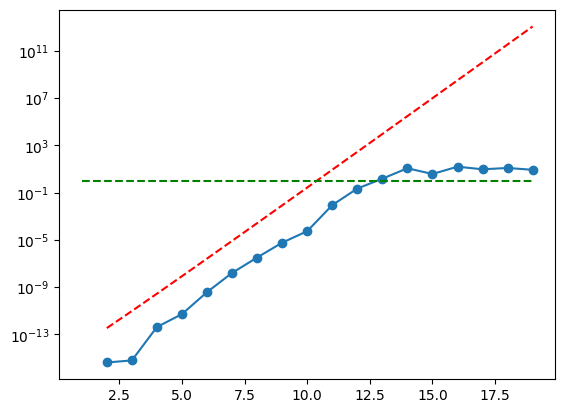

In [33]:
import matplotlib.pyplot as plt
plt.semilogy(dims[1:], error_list[1:], 'o-',
             dims[1:], [error_list[1]*(1+np.sqrt(2))**(4*x)/np.sqrt(x) for x in dims[1:]], 'r--')
plt.hlines(1, 1, n, colors='g', linestyles='dashed')